In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/heart_disease_clean.csv")

In [4]:
selected_features = ['thalach', 'thal', 'cp', 'ca', 'oldpeak']
X = df[selected_features]
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

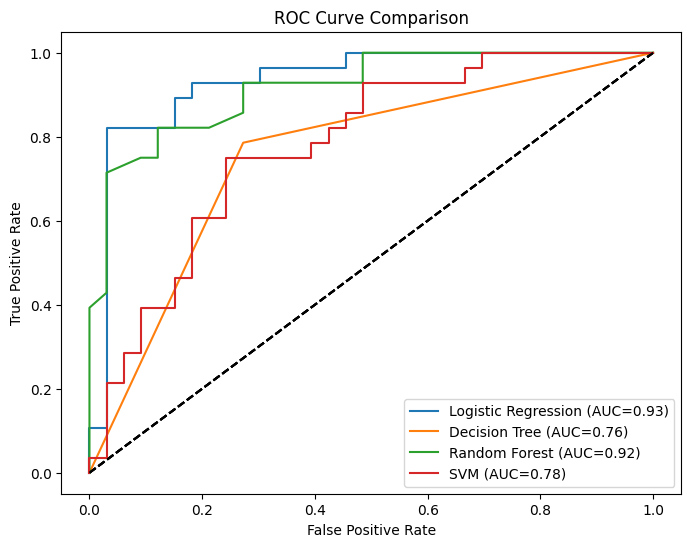

In [10]:
results = []

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, roc_auc])

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
    plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [9]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])
print(results_df.sort_values(by="ROC-AUC", ascending=False))

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.933983
2        Random Forest  0.852459   0.851852  0.821429  0.836364  0.917208
3                  SVM  0.704918   0.727273  0.571429  0.640000  0.780303
1        Decision Tree  0.754098   0.709677  0.785714  0.745763  0.756494
